# Sequential

In [11]:
sequential = {}

In [12]:
with open("sequential.txt", 'r', encoding='utf-8') as f:
    for line in f:
        if line[:5] == "GAUSS":
            name, dims = line.split()
            size = int(dims.split('x')[0])
            f.readline()
            time = f.readline()
            _, _,  result = time.split()
            result = result.split('=')[1]
            result = float(result.split('s')[0])

            sequential[size] = result
print(sequential)

{100: 0.00163, 200: 0.013372, 300: 0.040261, 400: 0.091136, 500: 0.17735, 600: 0.307726, 700: 0.5092, 800: 0.756928, 900: 1.08535, 1000: 1.50683, 1100: 2.12848, 1200: 2.66752, 1300: 3.31604, 1400: 4.17814, 1500: 5.07711, 1600: 6.29504, 1700: 7.52129, 1800: 8.61379, 1900: 10.1702, 2000: 11.8892}


# Parallel

In [23]:
parallel = {}

In [22]:
def filler(path):
    with open(path, 'r', encoding='utf-8') as f:
        for line in f:
            if line[:5] == "GAUSS":
                name, dims = line.split()
                size = int(dims.split('x')[0])
                f.readline()
                time = f.readline()
                _, _,  result = time.split()
                result = result.split('=')[1]
                result = float(result.split('s')[0])
                threadLine = f.readline()

                _, _, _, thread = threadLine.split()
            
                thread = int(thread)
            
                if size not in parallel:
                    parallel[size] = {}
                if thread not in parallel[size]:
                    parallel[size][thread] = 0
                parallel[size][thread] += result

In [24]:
filler("result/my_job.816268.out")
filler("result/my_job.816269.out")
filler("result/my_job.816270.out")

In [25]:
for i in parallel.keys():
    for j in parallel[i].keys():
        parallel[i][j] /= 3

In [26]:
print(parallel[200])

{2: 0.00813546, 4: 0.006075593333333333, 6: 0.0042229, 8: 0.00468458, 10: 0.0042157, 12: 0.0043670666666666665, 14: 0.004238793333333333, 16: 0.0047120999999999994, 18: 0.005048153333333334, 20: 0.005363346666666667, 22: 0.01049378, 24: 0.0067103399999999995, 26: 0.007659456666666666, 28: 0.008043763333333334, 30: 0.009994006666666666, 32: 0.015133123333333331, 34: 0.007701296666666667, 36: 0.005340443333333333, 38: 0.006036196666666667, 40: 0.005446976666666666, 42: 0.005011433333333333, 44: 0.010910250000000002, 46: 0.007529126666666667, 48: 0.01866487333333333, 50: 0.012050320000000002, 52: 0.009630553333333333, 54: 0.027235143333333333, 56: 0.02799160666666667, 58: 0.03142173333333333, 60: 0.024003523333333332, 62: 0.020456213333333334, 64: 0.050789980000000005, 66: 0.03318797666666667, 68: 0.051294556666666664, 70: 0.027318826666666667, 72: 0.030046053333333333, 74: 0.05234503666666667, 76: 0.0528633, 78: 0.04179579666666667, 80: 0.04346075666666666, 82: 0.05318319333333333, 84: 0

# To Numpy arrays

In [28]:
import numpy as np

In [39]:
x = np.zeros((81, 7)) # Threads
for i in range(7):
    x[0][i] = 1
for i in range(1, 81):
    for j in range(7):
        x[i][j] = 2*i

In [40]:
y = np.zeros((81, 7)) # Sizes
for i in range(81):
    for j in range(7):
        y[i][j] = 200 + 200*j

In [44]:
z = np.zeros((81, 7)) # Time
for i in range(7):
    z[0][i] = sequential[200+200*i]
for i in range(1, 81):
    for j in range(7):
        z[i][j] = parallel[200+200*j][2*i]

# Plot

In [48]:
from matplotlib import pyplot as plt
from matplotlib import cm

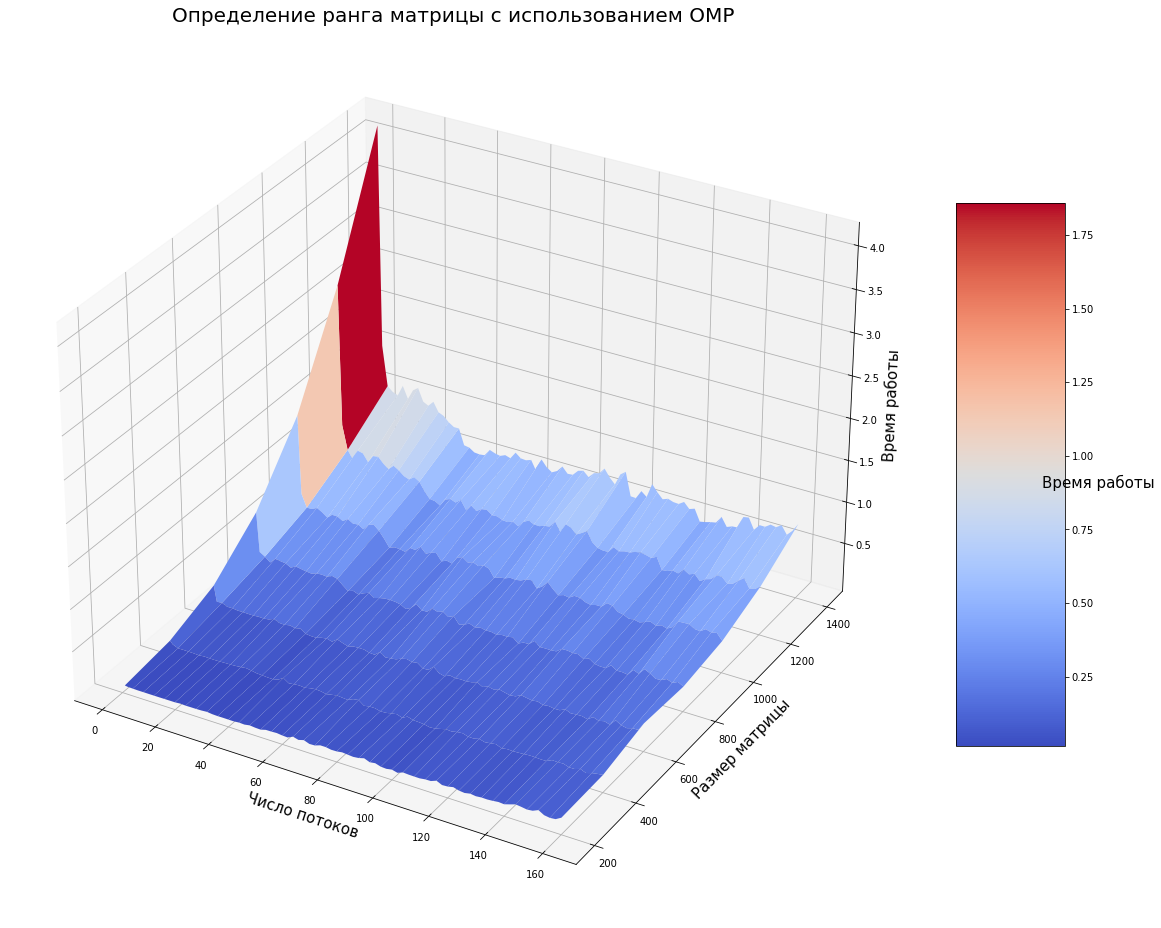

In [89]:
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111, projection='3d')
surface = ax.plot_surface(x, y, z, cmap=cm.coolwarm)

ax.set_xlabel('Число потоков', fontsize=15)
ax.set_ylabel('Размер матрицы', fontsize=15)
ax.set_zlabel('Время работы', fontsize=15, rotation=0)

bar = fig.colorbar( surface, shrink=0.5, aspect=5)
bar.set_label('Время работы', fontsize=15, rotation=0)

plt.title("Определение ранга матрицы с использованием OMP", fontsize=20)

plt.show()
fig.savefig("Result_plot")

